In [2]:
#import Required Libraries
import numpy as np
import pandas as pd



In [3]:
#load the Data 
Load_data = pd.read_csv("Hdataset.csv") 
print(Load_data)





     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [4]:
Load_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
Load_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print(Load_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
Load_data.shape

(303, 14)

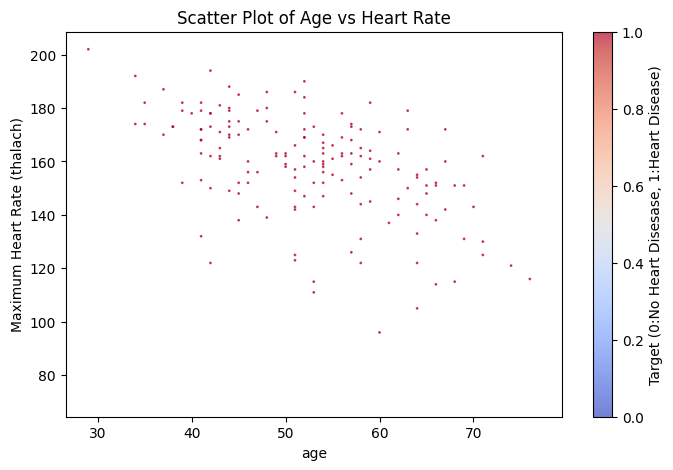

In [8]:
import matplotlib.pylab as plt
#Creates a figure with a width of 8 inches and a height of 5 inches.
plt.figure(figsize=(8,5))

#plt.scatter(x,y,c,cmap,alpha)
#where x=age --> x-axis
#y=thalach --> y-axis 
#c=target which is uses to color that differentiate heart disease patients
#cmap ues blue and red colors to show different categories in the target column
#alpha = 0.7, that adjusts transparency of the points 
plt.scatter(Load_data["age"],Load_data["thalach"],Load_data["target"],c=Load_data["target"],cmap="coolwarm",alpha=0.7) 

plt.xlabel("age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.title("Scatter Plot of Age vs Heart Rate")
#Adds a color bar that explains what the colors reprents
plt.colorbar(label="Target (0:No Heart Disesase, 1:Heart Disease)")
plt.show()

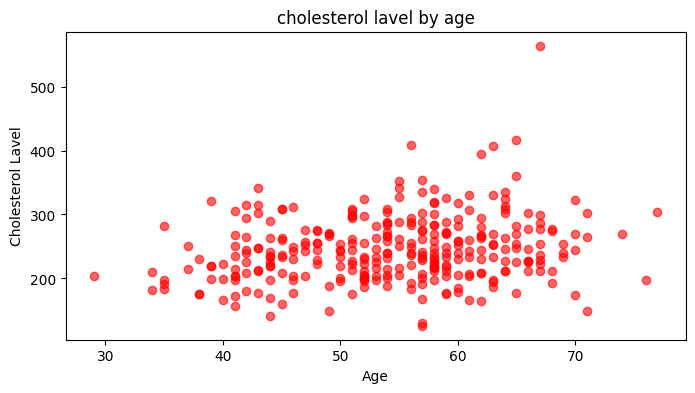

In [11]:
plt.figure(figsize=(8,4))
#age = x-axis
#chol(cholesterol level) = y-axis
#marker="o", places dotes on each data points to make them mode visible
#linestyle="-",uses a solid line to connect the points
#color="blue",color the line
#alpha=0.6,sets the transparecy of the line to 60%(0.6)
plt.scatter(Load_data["age"],Load_data["chol"],marker="o", linestyle="-",color="red",alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Cholesterol Lavel")
plt.title("cholesterol lavel by age")
plt.show()

In [12]:
Load_data.fillna(Load_data.mean(numeric_only=True),inplace=True)



In [13]:
#Encoding categorical data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

Preprocessor = ColumnTransformer([
    ('num',StandardScaler(),numerical_features), #standardization
    ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features) #encoding categorical data

])

In [14]:
#Spliting the Data into Trian  & test sets (using train_test_split)
from sklearn.model_selection import train_test_split
x = Load_data.drop("target",axis=1)
y = Load_data["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)


C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
